In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
with open(r'E:\projects\AI\ChatBot\Friends\Ques.txt','r') as file:
    ques = eval(file.read())
with open(r'E:\projects\AI\ChatBot\Friends\Ans.txt','r') as file:
    anss = eval(file.read())
with open(r'E:\projects\AI\ChatBot\Friends\convos.txt','r') as file:
    convos = eval(file.read())
with open(r'E:\projects\AI\ChatBot\Friends\encrypter.txt','r') as file:
    encrypter = eval(file.read())
with open(r'E:\projects\AI\ChatBot\Friends\Openings.txt','r') as file:
    openings = eval(file.read())

In [3]:
lens = [len(i) for i in ques]

In [4]:
np.median(lens)

9.0

In [5]:
np.mean(lens)

13.096934127540294

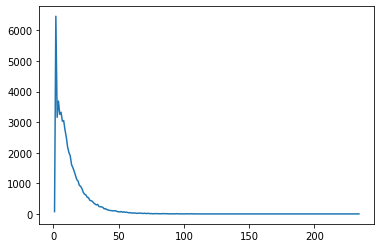

In [6]:
plt.plot(np.unique(lens), list(map(lambda x: lens.count(x), np.unique(lens))))

In [7]:
lens.count(50)

70

In [8]:
wordtoint = {"<PAD>":0} # try with 1 and 0(sparse matrix)
for convo in convos:
    for sens in convo:
        for word in sens.split(' '):
            if not (word in wordtoint):
                wordtoint[word] = len(wordtoint)+1
inttoword = {_v:_k for _k,_v in wordtoint.items()}

In [9]:
encrypt = lambda word: wordtoint[word]
decrypt = lambda word: inttoword[word]

In [10]:
def packing_sen(sen, encry=True):
    result = " "
    if encry:
        result = result.join(map(decrypt, sen))
    else:
        result = sen
    prespace = ['"', '$']
    nospace  = ['-', '/']
    postspace = ['<DOT>','!', '%', ',', '.', '?']
    for i in prespace:
        result = result.replace(i + ' ', i)
    for i in nospace:
        result = result.replace(' ' + i + ' ', i)
    result = result.replace('...', '<DOT>')
    for i in postspace:
        result = result.replace(' ' + i, i)
    result = result.replace('<DOT>', '...')
    result = result.replace('  ', ' ')
    return result.strip()

In [12]:
ques[45]

[126, 29]

In [16]:
list(map(decrypt, ques[45]))

['hi', '.']

In [18]:
list(map(decrypt, anss[45]))

['so',
 'you',
 'wanna',
 'tell',
 'us',
 'now',
 ',',
 'or',
 'are',
 'we',
 'waiting',
 'for',
 'four',
 'wet',
 'bridesmaids',
 '?']

In [20]:
packing_sen(anss[45])

'so you wanna tell us now, or are we waiting for four wet bridesmaids?'

In [25]:
ques[776]

[109, 198, 1489, 561, 278, 1317, 449, 29]